In [2]:
import math
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd
plt.rcParams['figure.figsize'] = (16, 9)
style.use('ggplot')

In [4]:
df = pd.read_csv(
    'G:\.shortcut-targets-by-id\1GLhesaekxPRKr-lkNYX-mtfouqJhqhXN\SIBEUX\KULIAH\00 - UNEJ\Algorithm Programming\PEMROGRAMAN\Main Program\data banjirre.csv')
df


ValueError: embedded null character

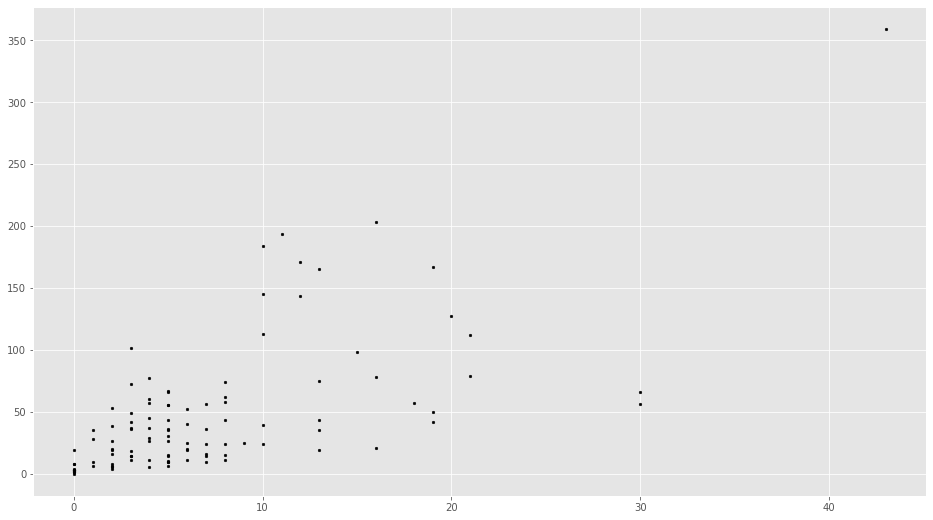

In [41]:
f1 = df['jumlah_banjir'].values
f2 = df['jumlah_bencana_alam'].values
original_data = np.array(list(zip(f1, f2)))
data = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

In [42]:
def init_centroids(k, data):
  c = []
  s = np.random.randint(low=1, high=len(data), size=k)
  while (len(s) != len(set(s))):
          s = np.random.randint(low=1, high=len(data), size=k)
      # For every i in s, get ith feature from dataset, and add it to list
  for i in s:
      c.append(data[i])
  return c
    

In [43]:
def euc_dist(a, b):
  sum = 0
  for i, j in zip(a, b):
      a = (i - j) * (i - j)
      sum = sum + a
  return math.sqrt(sum)

In [44]:
def cal_dist(centroids, data):
  c_dist = []
    # For each centroid c, iterate through all points in data to calculate its distance from c
  for i in centroids:
      temp = []
      for j in data:
          temp.append(euc_dist(i, j))
      c_dist.append(temp)
  return c_dist
 

In [45]:
def perf_clustering(k, dist_table):
  clusters = []
  for i in range(k):
      clusters.append([])
  # start clustering data points, such that each point is clustered to nearest centroid
  for i in range(len(dist_table[0])):
      d = []
      for j in range(len(dist_table)):
          d.append(dist_table[j][i])
      clusters[d.index(min(d))].append(i)
  return clusters

In [46]:
def update_centroids(centroids, cluster_table, data):
  for i in range(len(centroids)):
        # Update the centroid if there are some flowers within this centroid
        if (len(cluster_table[i]) > 0):
            temp = []
            # Copy features of cluster members to temp list
            for j in cluster_table[i]:
                temp.append(list(data[j]))
            # Take mean of features of all members of cluster to get new centroid location
            sum = [0] * len(centroids[i])
            for l in temp:
                sum = [(a + b) for a, b in zip(sum, l)]
            centroids[i] = [p / len(temp) for p in sum]
  
  return centroids
 

In [47]:
def check_n_stop(dist_mem, cluster_mem):
  c1 = all(x == dist_mem[0] for x in dist_mem)
    # Check if cluster table has not changed over past iterations
  c2 = all(y == cluster_mem[0] for y in cluster_mem)

  if c1:
      print("Stopping... Distance table has not changed from few iterations")
  elif c2:
      print("Stopping... Cluster table has not changed from few iterations")
  return c1 or c2

In [48]:

k = 3
max_iterations = 100
dist_mem = []
cluster_mem = []

# Initialize centroids
centroids = init_centroids(k, data)
# Calculate distance table
distance_table = cal_dist(centroids, data)
# Perform clustering based on above generated distance table
cluster_table = perf_clustering(k, distance_table)
# Update centroid location based on above generated cluster table
newCentroids = update_centroids(centroids, cluster_table, data)

# Add distance and cluster table to memory list
dist_mem.append(distance_table)
cluster_mem.append(cluster_table)

# Repeat from step 2 till stopping criteria is met
for i in range(max_iterations):
    distance_table = cal_dist(newCentroids, data)
    cluster_table = perf_clustering(k, distance_table)
    newCentroids = update_centroids(newCentroids, cluster_table, data)

    # Check for stopping criteria
    # Maintain memory for past distance table and cluster table
    dist_mem.append(distance_table)
    cluster_mem.append(cluster_table)
    # If distance/cluster has not changed over last 10 iterations, stop, else continue
    if len(dist_mem) > 10:
        dist_mem.pop(0)
        cluster_mem.pop(0)
        if check_n_stop(dist_mem, cluster_mem):
            print("Stopped at iteration #", i)
            break


  

Stopping... Cluster table has not changed from few iterations
Stopped at iteration # 17


In [49]:
for i in range(len(newCentroids)):
  print("centroid ",i, " :", newCentroids[i])

centroid  0  : [10.15625, 64.25]
centroid  1  : [16.6, 185.7]
centroid  2  : [4.090909090909091, 17.151515151515152]


In [50]:
# Display the final results
dump = []
indeks = dict()
for i in range(len(newCentroids)):
    # print("Centroid #", i, ": ", newCentroids[i])
    # print("jumlah data : ", len(cluster_table[i]))
    # print("Members of the cluster: ")
    for j in range(len(cluster_table[i])):
        # print(original_data[cluster_table[i][j]])
        af = df[(df["jumlah_banjir"] == original_data[cluster_table[i][j]][0]) & (
            df["jumlah_bencana_alam"] == original_data[cluster_table[i][j]][1])]
        if len(af) > 1:
            if indeks.setdefault(str(','.join([str(i) for i in af['id']]))) == None:
                year = [str(i) for i in af['tahun']]
                town = af['nama_kabupaten_kota'].values
                p = str(','.join([str(i) for i in af['id']]))
                cek = indeks.update({p:0})
                z = indeks.setdefault(str(','.join([str(i) for i in af['id']])))
                dump.append([i, newCentroids[i], len(cluster_table[i]),
                            original_data[cluster_table[i][j]], original_data[cluster_table[i][j]][0], 
                            original_data[cluster_table[i][j]][1],town[z] ,year[z]])
            else:
                year = [str(i) for i in af['tahun']]
                town = af['nama_kabupaten_kota'].values
                p = str(','.join([str(i) for i in af['id']]))
                test = indeks.setdefault(str(','.join([str(i) for i in af['id']])))
                cek = indeks.update({p:test+1})
                test = indeks.setdefault(str(','.join([str(i) for i in af['id']])))
                dump.append([i, newCentroids[i], len(cluster_table[i]),
                        original_data[cluster_table[i][j]], original_data[cluster_table[i][j]][0], 
                        original_data[cluster_table[i][j]][1],town[test] ,year[test]])
        else:
            year = [str(i) for i in af['tahun']]
            town = af['nama_kabupaten_kota'].values
            dump.append([i, newCentroids[i], len(cluster_table[i]),
                        original_data[cluster_table[i][j]], original_data[cluster_table[i][j]][0],
                        original_data[cluster_table[i][j]][1]," ".join(af['nama_kabupaten_kota'].values) ," ".join(year)])
cols = ["indeks", "Centroid", "Jumlah data",
        "Member of the cluster", "Jumlah Banjir", "Jumlah Bencana Alam", "Nama Kabupaten/Kota","Tahun"]
pd.DataFrame(dump)
sf = pd.DataFrame(dump, columns=cols)
pd.set_option('display.max_row',df.shape[0]+1)
sf


,indeks,Centroid,Jumlah data,Member of the cluster,Jumlah Banjir,Jumlah Bencana Alam,Nama Kabupaten/Kota,Tahun
0,0,"[10.15625, 64.25]",32,"[30, 66]",30,66,KABUPATEN BANDUNG,2017
1,0,"[10.15625, 64.25]",32,"[5, 55]",5,55,KABUPATEN TASIKMALAYA,2017
2,0,"[10.15625, 64.25]",32,"[4, 45]",4,45,KABUPATEN CIAMIS,2017
3,0,"[10.15625, 64.25]",32,"[4, 57]",4,57,KABUPATEN KUNINGAN,2017
4,0,"[10.15625, 64.25]",32,"[8, 43]",8,43,KABUPATEN MAJALENGKA,2017
5,0,"[10.15625, 64.25]",32,"[8, 74]",8,74,KABUPATEN SUMEDANG,2017
6,0,"[10.15625, 64.25]",32,"[5, 43]",5,43,KABUPATEN PANGANDARAN,2017
7,0,"[10.15625, 64.25]",32,"[7, 56]",7,56,KOTA TASIKMALAYA,2017
8,0,"[10.15625, 64.25]",32,"[4, 77]",4,77,KABUPATEN BOGOR,2018
9,0,"[10.15625, 64.25]",32,"[3, 101]",3,101,KABUPATEN SUKABUMI,2018


In [56]:
# Display the final results
dump = []
indeks = dict()
for i in range(len(newCentroids)):
    # print("Centroid #", i, ": ", newCentroids[i])
    # print("jumlah data : ", len(cluster_table[i]))
    # print("Members of the cluster: ")
    for j in range(len(cluster_table[i])):
        # print(original_data[cluster_table[i][j]])
        af = df[(df["jumlah_banjir"] == original_data[cluster_table[i][j]][0]) & (
            df["jumlah_bencana_alam"] == original_data[cluster_table[i][j]][1])]
        if len(af) > 1:
            if indeks.setdefault(str(','.join([str(i) for i in af['id']]))) == None:
                year = [str(i) for i in af['tahun']]
                town = af['nama_kabupaten_kota'].values
                p = str(','.join([str(i) for i in af['id']]))
                cek = indeks.update({p:0})
                z = indeks.setdefault(str(','.join([str(i) for i in af['id']])))
                dump.append([i, newCentroids[i], len(cluster_table[i]),
                            original_data[cluster_table[i][j]], original_data[cluster_table[i][j]][0], 
                            original_data[cluster_table[i][j]][1],town[z] ,year[z]])
            else:
                year = [str(i) for i in af['tahun']]
                town = af['nama_kabupaten_kota'].values
                p = str(','.join([str(i) for i in af['id']]))
                test = indeks.setdefault(str(','.join([str(i) for i in af['id']])))
                cek = indeks.update({p:test+1})
                test = indeks.setdefault(str(','.join([str(i) for i in af['id']])))
                dump.append([i, newCentroids[i], len(cluster_table[i]),
                        original_data[cluster_table[i][j]], original_data[cluster_table[i][j]][0], 
                        original_data[cluster_table[i][j]][1],town[test] ,year[test]])
        else:
            year = [str(i) for i in af['tahun']]
            town = af['nama_kabupaten_kota'].values
            dump.append([i, newCentroids[i], len(cluster_table[i]),
                        original_data[cluster_table[i][j]], original_data[cluster_table[i][j]][0],
                        original_data[cluster_table[i][j]][1]," ".join(af['nama_kabupaten_kota'].values) ," ".join(year)])
cols = ["indeks", "Centroid", "Jumlah data",
        "Member of the cluster", "Jumlah Banjir", "Jumlah Bencana Alam", "Nama Kabupaten/Kota","Tahun"]
pd.DataFrame(dump)
sf = pd.DataFrame(dump, columns=cols)
inputKota = str(input("Kota/Kabupaten : ").upper())
sf[sf['Nama Kabupaten/Kota'].isin([inputKota])]


,indeks,Centroid,Jumlah data,Member of the cluster,Jumlah Banjir,Jumlah Bencana Alam,Nama Kabupaten/Kota,Tahun
55,2,"[4.090909090909091, 17.151515151515152]",66,"[0, 0]",0,0,KOTA DEPOK,2017
73,2,"[4.090909090909091, 17.151515151515152]",66,"[0, 1]",0,1,KOTA DEPOK,2018
89,2,"[4.090909090909091, 17.151515151515152]",66,"[2, 6]",2,6,KOTA DEPOK,2019
104,2,"[4.090909090909091, 17.151515151515152]",66,"[5, 14]",5,14,KOTA DEPOK,2020


In [52]:
# dump1 = []
# for i in range(len(newCentroids)):
#     for j in range(len(cluster_table[i])):
#         gf = df[(df["jumlah_banjir"] == original_data[cluster_table[i][j]][0]) & (
#             df["jumlah_bencana_alam"] == original_data[cluster_table[i][j]][1])]
#         year = [str(i) for i in gf['tahun']]
#         town = gf['nama_kabupaten_kota'].values
#         dump1.append([i, newCentroids[i], len(cluster_table[i]),
#                     original_data[cluster_table[i][j]], original_data[cluster_table[i][j]][0], original_data[cluster_table[i][j]][1],",".join(gf['nama_kabupaten_kota'].values) ,", ".join(year)])

# cols = ["indeks", "Centroid", "Jumlah data",
#         "Member of the cluster", "Jumlah Banjir", "Jumlah Bencana Alam", "Nama Kabupaten/Kota","Tahun"]
# pd.DataFrame(dump1)
# hf = pd.DataFrame(dump1, columns=cols)
# hf


In [53]:
# pd.set_option('display.max_row',df.shape[0]+1)
# sf
# a = str(','.join([str(i) for i in af['id']]))
# b = str(a)
# cek = indeks.setdefault(a, 0)
# # a = indeks.clear()
# cek2 = indeks.update({a:1})
# print(a)
# print(cek)
# print(indeks)
